# Showcase how to plot results from a simulation of virtual Argo floats

Requirements:
- some simulation results
- velocity fields for superimposition on figures (not mandatory)

***
Script prepared by [Kevin Balem](http://github.com/quai20) (Feb. 2020)

This work is part and was supported by the following projects:
<div>
<img src="https://avatars1.githubusercontent.com/u/58258213?s=460&v=4" width="70"/>
<img src="http://www.argo-france.fr/wp-content/uploads/2019/10/Argo-logo_banner-color.png" width="200"/>
<img src="https://www.umr-lops.fr/var/storage/images/_aliases/logo_main/medias-ifremer/medias-lops/logos/logo-lops-2/1459683-4-fre-FR/Logo-LOPS-2.png" width="70"/>
</div>

In [1]:
%matplotlib inline

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import cartopy.crs as ccrs
import cartopy.feature as cfeature
land_feature=cfeature.NaturalEarthFeature(category='physical',name='land',scale='50m',facecolor=[0.4,0.6,0.7])

In [18]:
lat0=36.00
lon0=-50.00

simu=xr.open_dataset('/home1/datawork/kbalem/Parcels/test_20200225_dat.nc')
field=xr.open_dataset('/home/datawork-lops-oh/somovar/WP1/data/GLOBAL-ANALYSIS-FORECAST-PHY-001-024/20191205_global-analysis-forecast-phy-001-024.nc')

In [20]:
simu

<xarray.Dataset>
Dimensions:      (obs: 731, traj: 100)
Dimensions without coordinates: obs, traj
Data variables:
    trajectory   (traj, obs) float64 ...
    time         (traj, obs) datetime64[ns] ...
    lat          (traj, obs) float32 ...
    lon          (traj, obs) float32 ...
    z            (traj, obs) float32 ...
    cycle_phase  (traj, obs) float32 ...
    cycle_age    (traj, obs) float32 ...
    drift_age    (traj, obs) float32 ...
Attributes:
    feature_type:           trajectory
    Conventions:            CF-1.6/CF-1.7
    ncei_template_version:  NCEI_NetCDF_Trajectory_Template_v2.0
    parcels_version:        2.1.2
    parcels_mesh:           spherical

Text(0.5, 1.0, '')

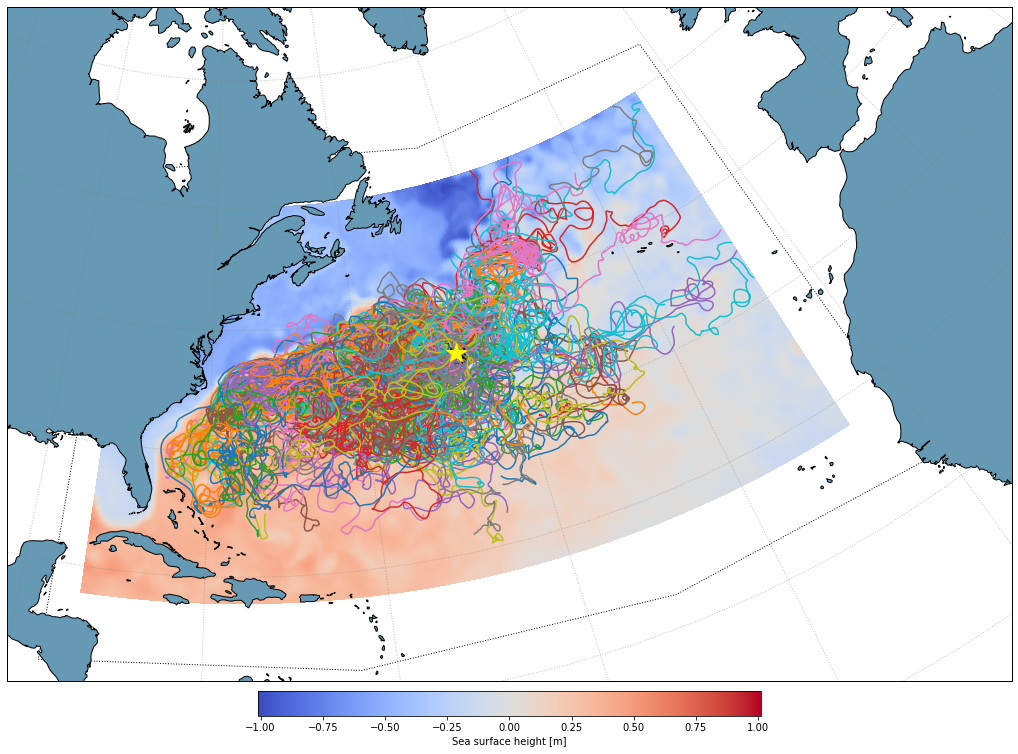

In [50]:
import matplotlib.patches as mpatches

pr1=ccrs.PlateCarree()
# pr2=ccrs.LambertConformal(-72,35,false_easting=0.0, false_northing=0.0, secant_latitudes=None, standard_parallels=None, cutoff=-30)

fig=plt.figure(figsize=(18,18))
ax3 = fig.add_subplot(1,1,1,projection=pr1)
ax3.add_feature(land_feature, edgecolor='black')
ax3.set_extent([simu.lon.min()-10, simu.lon.max()+10, simu.lat.min()-10, simu.lat.max()+4])

ax3.gridlines(linewidth=1, color='gray', alpha=0.5, linestyle=':')

field['zos'][0][:][:].plot(cmap=plt.cm.coolwarm,cbar_kwargs={'orientation': 'horizontal', 'shrink':0.5, 'pad':0.01},transform=pr1)

#ax3.scatter(simu['lon'],simu['lat'],s=5,c=simu['trajectory'],transform=pr1)
for i in simu.traj:
    tmp=simu.isel(traj=i).sortby('time')
    ax3.plot(tmp['lon'][0],tmp['lat'][0],'k.',transform=pr1)
    ax3.plot(tmp['lon'],tmp['lat'],linewidth=1.5,transform=pr1)

ax3.add_patch(mpatches.Rectangle(xy=[simu.lon.min()-8, simu.lat.min()-8], width=(simu.lon.max()-simu.lon.min()+12), height=(simu.lat.max()-simu.lat.min()+11),
                                    edgecolor='k',facecolor='none',linestyle=':',transform=pr1))

ax3.plot(lon0,lat0,marker='*',color='yellow', markersize=20,transform=ccrs.Geodetic())

plt.title("")

In [16]:
simu

<xarray.Dataset>
Dimensions:      (obs: 731, traj: 100)
Dimensions without coordinates: obs, traj
Data variables:
    trajectory   (traj, obs) float64 ...
    time         (traj, obs) datetime64[ns] ...
    lat          (traj, obs) float32 35.74091 35.69642 ... 33.776722 33.733154
    lon          (traj, obs) float32 -49.252644 -49.40654 ... -28.8301
    z            (traj, obs) float32 ...
    cycle_phase  (traj, obs) float32 ...
    cycle_age    (traj, obs) float32 ...
    drift_age    (traj, obs) float32 ...
Attributes:
    feature_type:           trajectory
    Conventions:            CF-1.6/CF-1.7
    ncei_template_version:  NCEI_NetCDF_Trajectory_Template_v2.0
    parcels_version:        2.1.2
    parcels_mesh:           spherical